In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from scipy import stats
import seaborn as sns
plt.rcParams['font.size'] = 18
#plt.rcParams['font.family'] = "serif"
tdir = 'in'
major = 5.0
minor = 3.0
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

In [59]:
def get_average_all_exps(result_dict, get_exps_min=False):
    
    multiexps = {}
    for k, runs in result_dict.items():
        #print(k)
        #for runs in precs_dict[k]:
        #print(runs)
        for ind, run in enumerate(runs):
            #print(run)
            try:
                if ind in multiexps.keys():
                    multiexps[ind].append(run)
                else:
                    multiexps[ind] = [run]
            except: continue


    exps_mean = []
    exps_min = []
    for exp in multiexps.keys():
        exps_mean.append(np.mean(multiexps[exp]))
        exps_min.append(np.min(multiexps[exp]))
        #print(np.mean(multiexps[exp]), np.std(multiexps[exp]))

    assert len(exps_mean) == len(exps_min)

    #print(f'Mean {np.mean(exps_mean)* 100:.2f}\u00B1{np.std(exps_mean)* 100:.2f}')
    #print(f'Min {np.mean(exps_min)* 100:.2f}\u00B1{np.std(exps_min)* 100:.2f}')
    
    if get_exps_min:
        return exps_mean, exps_min
    else:
        return exps_mean 

In [68]:
def ifs_results(scenario, replay_config, 
                cnt_rate=0.1, anomaly_perct=0.5,
               replay_portion=1.0, num_replay_sample=500):

    target_classes = 100
    
    results_dir = './ember_results_cl/RC_Cluster/' + str(scenario) + '/' + str(target_classes) + '/'

    if replay_config == 'grs':
        result_file = str(replay_config)  + '_' + str(replay_portion) + '_results.txt'
    else:
        result_file = str(replay_config)  + '_' +\
                    str(num_replay_sample)  + '_' + str(cnt_rate) + '_' + str(anomaly_perct) + '_results.txt'

        
    result_path = results_dir + result_file 
    print(result_path)
    
    accs_dict = {}
    precs_dict = {}
    recalls_dict = {}
    f1_dict = {}

    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:
                #print(line)
                infos = line.split('\t')
                task = infos[0]
                #print(int(task))
                acc, prec, recal, f1 = float(infos[1]), float(infos[2]), float(infos[3]), float(infos[4])

                if task in accs_dict.keys():
                    accs_dict[task].append(acc)
                    precs_dict[task].append(prec)
                    recalls_dict[task].append(recal)
                    f1_dict[task].append(f1)
                else:
                    accs_dict[task] = [acc]
                    precs_dict[task] = [prec]
                    recalls_dict[task] = [recal]
                    f1_dict[task] = [f1]

    #print(accs_dict)
    
    #accs_all_task = []
    accs_all = get_average_all_exps(accs_dict, get_exps_min=False)
    precs_all, precs_all_min = get_average_all_exps(precs_dict, get_exps_min=True)
    
    recalls_all =get_average_all_exps(recalls_dict, get_exps_min=False)
    f1_all = get_average_all_exps(f1_dict, get_exps_min=False)
    
    
    precs_all_task = []
    f1_all_task = []
    for k, v in precs_dict.items():
        precs_all_task.append(v)
        f1_all_task.append(f1_dict[k])
        

    #print()
    if replay_config == 'grs':
            print(f'\t\t {str(replay_config)}-{str(replay_portion*100)}% w/ Contamination {cnt_rate*100} and Anomaly Perct {anomaly_perct*100}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    else:
        print(f'\t\t {str(replay_config)} w/ Contamination {cnt_rate*100} and Anomaly Perct {anomaly_perct*100}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    
    
    #print(f'\t\t {str(replay_config)} w/ Contamination {cnt_rate*100} and Anomaly Perct {anomaly_perct*100}\n#################\t###################\t###################\t###################\nacc    {np.mean(accs_all)* 100:.2f}\u00B1{np.std(accs_all) * 100:.2f} \tprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f}  \n\trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    #print(f'\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f}\trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \n#################\t###################')

    print()
    return  np.array(precs_all_task), np.array(accs_all), np.array(precs_all), np.array(recalls_all), np.array(f1_all_task), np.array(f1_all)


grs_00, _, _, _, _, _ = ifs_results('class', replay_config='grs', replay_portion=0.0)
grs_05, _, _, _, _, _ = ifs_results('class', replay_config='grs', replay_portion=.05)
grs_10, _, _, _, _, _ = ifs_results('class', replay_config='grs', replay_portion=.10)
grs_20, _, _, _, _, _ = ifs_results('class', replay_config='grs', replay_portion=.20)
grs_50, _, _, _, _, _ = ifs_results('class', replay_config='grs', replay_portion=.50)

grs_100, _, _, _, _, _ = ifs_results('class', replay_config='grs', replay_portion=1.0)

# ifs_an10, _, _, _, _, _ = ifs_results('class', replay_config='ifs', cnt_rate=0.1, anomaly_perct=0.1, num_replay_sample=500)



./ember_results_cl/RC_Cluster/class/100/grs_0.0_results.txt
		 grs-0.0% w/ Contamination 10.0 and Anomaly Perct 50.0
#################	###################	###################	###################
prec   30.07±1.22 	prec-min	10.53±1.02 	recall	 30.09±1.23 	f1	28.66±0.81 
#################	###################	###################	###################

./ember_results_cl/RC_Cluster/class/100/grs_0.05_results.txt
		 grs-5.0% w/ Contamination 10.0 and Anomaly Perct 50.0
#################	###################	###################	###################
prec   84.09±1.80 	prec-min	78.65±2.51 	recall	 84.08±1.76 	f1	35.78±1.66 
#################	###################	###################	###################

./ember_results_cl/RC_Cluster/class/100/grs_0.1_results.txt
		 grs-10.0% w/ Contamination 10.0 and Anomaly Perct 50.0
#################	###################	###################	###################
prec   85.10±1.40 	prec-min	81.09±1.81 	recall	 85.06±1.36 	f1	34.43±1.17 
#################	############

In [101]:
def ifs_results(scenario, replay_config, 
                cnt_rate=0.1, anomaly_perct=0.5,
               replay_portion=1.0, num_replay_sample=500):

    target_classes = 100
    
    results_dir = './ember_results_cl/RC_Cluster_New/' + str(scenario) + '/' + str(target_classes) + '/'

    if replay_config == 'grs':
        result_file = str(replay_config)  + '_' + str(replay_portion) + '_results.txt'
    else:
        result_file = str(replay_config)  + '_' +\
                    str(num_replay_sample)  + '_' + str(cnt_rate) + '_' + str(anomaly_perct) + '_results.txt'

        
    result_path = results_dir + result_file 
    print(result_path)
    
    accs_dict = {}
    precs_dict = {}
    recalls_dict = {}
    f1_dict = {}

    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:
                #print(line)
                infos = line.split('\t')
                task = infos[0]
                #print(int(task))
                acc, prec, recal, f1 = float(infos[1]), float(infos[2]), float(infos[3]), float(infos[4])

                if task in accs_dict.keys():
                    accs_dict[task].append(acc)
                    precs_dict[task].append(prec)
                    recalls_dict[task].append(recal)
                    f1_dict[task].append(f1)
                else:
                    accs_dict[task] = [acc]
                    precs_dict[task] = [prec]
                    recalls_dict[task] = [recal]
                    f1_dict[task] = [f1]

    #print(accs_dict)
    
    #accs_all_task = []
    accs_all = get_average_all_exps(accs_dict, get_exps_min=False)
    precs_all, precs_all_min = get_average_all_exps(precs_dict, get_exps_min=True)
    
    recalls_all =get_average_all_exps(recalls_dict, get_exps_min=False)
    f1_all = get_average_all_exps(f1_dict, get_exps_min=False)
    
    
    precs_all_task = []
    f1_all_task = []
    for k, v in precs_dict.items():
        precs_all_task.append(v)
        f1_all_task.append(f1_dict[k])
        

    #print()
    if replay_config == 'grs':
            print(f'\t\t {str(replay_config)}-{str(replay_portion*100)}% w/ Contamination {cnt_rate*100} and Anomaly Perct {anomaly_perct*100}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    else:
        print(f'\t\t {str(replay_config)}-{str(num_replay_sample)} w/ Contamination {cnt_rate*100} and Anomaly Perct {anomaly_perct*100}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    
    
    #print(f'\t\t {str(replay_config)} w/ Contamination {cnt_rate*100} and Anomaly Perct {anomaly_perct*100}\n#################\t###################\t###################\t###################\nacc    {np.mean(accs_all)* 100:.2f}\u00B1{np.std(accs_all) * 100:.2f} \tprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f}  \n\trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    #print(f'\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f}\trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \n#################\t###################')

    print()
    return  np.array(precs_all_task), np.array(accs_all), np.array(precs_all), np.array(recalls_all), np.array(f1_all_task), np.array(f1_all)


ifs_an50r50, _, _, _, _, _ = ifs_results('class', replay_config='ifs',\
                                         cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=50)

ifs_an50r100, _, _, _, _, _ = ifs_results('class', replay_config='ifs',\
                                          cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=100)
ifs_an50r200, _, _, _, _, _ = ifs_results('class', replay_config='ifs',\
                                          cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=200)
ifs_an500, _, _, _, _, _ = ifs_results('class', replay_config='ifs', cnt_rate=0.1, anomaly_perct=0.5)
ifs_1K, _, _, _, _, _ = ifs_results('class', replay_config='ifs',\
                                         cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=1000)

ifs_3K, _, _, _, _, _ = ifs_results('class', replay_config='ifs',\
                                         cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=3000)

ifs_5K, _, _, _, _, _ = ifs_results('class', replay_config='ifs',\
                                         cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=5000)


./ember_results_cl/RC_Cluster_New/class/100/ifs_50_0.1_0.5_results.txt
		 ifs-50 w/ Contamination 10.0 and Anomaly Perct 50.0
#################	###################	###################	###################
prec   82.22±2.53 	prec-min	75.40±3.50 	recall	 82.37±2.55 	f1	35.38±1.84 
#################	###################	###################	###################

./ember_results_cl/RC_Cluster_New/class/100/ifs_100_0.1_0.5_results.txt
		 ifs-100 w/ Contamination 10.0 and Anomaly Perct 50.0
#################	###################	###################	###################
prec   84.31±0.88 	prec-min	80.02±1.10 	recall	 84.28±0.86 	f1	33.98±0.71 
#################	###################	###################	###################

./ember_results_cl/RC_Cluster_New/class/100/ifs_200_0.1_0.5_results.txt
		 ifs-200 w/ Contamination 10.0 and Anomaly Perct 50.0
#################	###################	###################	###################
prec   84.48±1.39 	prec-min	80.94±1.79 	recall	 84.62±1.43 	f1	32.63±1.75 
#

In [96]:
def ifs_results(scenario, replay_config, 
                cnt_rate=0.1, anomaly_perct=0.5,
               replay_portion=1.0, num_replay_sample=500):

    target_classes = 100
    
    results_dir = './ember_results_cl/RC_Cluster_New/' + str(scenario) + '/' + str(target_classes) + '/'

    if replay_config == 'grs':
        result_file = str(replay_config)  + '_' + str(replay_portion) + '_results.txt'
    elif replay_config == 'aws':
        result_file = str(replay_config) + '_act4_' + str(num_replay_sample) + '_' + str(cnt_rate) + '_' + str(anomaly_perct) + '_results.txt'
    else:
        result_file = str(replay_config)  + '_' +\
                    str(num_replay_sample)  + '_' + str(cnt_rate) + '_' + str(anomaly_perct) + '_results.txt'

        
    result_path = results_dir + result_file 
    print(result_path)
    
    accs_dict = {}
    precs_dict = {}
    recalls_dict = {}
    f1_dict = {}

    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:
                #print(line)
                infos = line.split('\t')
                task = infos[0]
                #print(int(task))
                acc, prec, recal, f1 = float(infos[1]), float(infos[2]), float(infos[3]), float(infos[4])

                if task in accs_dict.keys():
                    accs_dict[task].append(acc)
                    precs_dict[task].append(prec)
                    recalls_dict[task].append(recal)
                    f1_dict[task].append(f1)
                else:
                    accs_dict[task] = [acc]
                    precs_dict[task] = [prec]
                    recalls_dict[task] = [recal]
                    f1_dict[task] = [f1]

    #print(accs_dict)
    
    #accs_all_task = []
    accs_all = get_average_all_exps(accs_dict, get_exps_min=False)
    precs_all, precs_all_min = get_average_all_exps(precs_dict, get_exps_min=True)
    
    recalls_all =get_average_all_exps(recalls_dict, get_exps_min=False)
    f1_all = get_average_all_exps(f1_dict, get_exps_min=False)
    
    
    precs_all_task = []
    f1_all_task = []
    for k, v in precs_dict.items():
        precs_all_task.append(v)
        f1_all_task.append(f1_dict[k])
        

    #print()
    if replay_config == 'grs':
            print(f'\t\t {str(replay_config)}-{str(replay_portion*100)}% w/ Contamination {cnt_rate*100} and Anomaly Perct {anomaly_perct*100}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    else:
        print(f'\t\t {str(replay_config)}-{str(num_replay_sample)} w/ Contamination {cnt_rate*100} and Anomaly Perct {anomaly_perct*100}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    
    
    #print(f'\t\t {str(replay_config)} w/ Contamination {cnt_rate*100} and Anomaly Perct {anomaly_perct*100}\n#################\t###################\t###################\t###################\nacc    {np.mean(accs_all)* 100:.2f}\u00B1{np.std(accs_all) * 100:.2f} \tprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f}  \n\trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    #print(f'\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f}\trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \n#################\t###################')

    print()
    return  np.array(precs_all_task), np.array(accs_all), np.array(precs_all), np.array(recalls_all), np.array(f1_all_task), np.array(f1_all)


aws_50, _, _, _, _, _ = ifs_results('class', replay_config='aws',\
                                         cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=50)

aws_100, _, _, _, _, _ = ifs_results('class', replay_config='aws',\
                                          cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=100)
aws_200, _, _, _, _, _ = ifs_results('class', replay_config='aws',\
                                          cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=200)
aws_500, _, _, _, _, _ = ifs_results('class', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5)
aws_1K, _, _, _, _, _ = ifs_results('class', replay_config='aws',\
                                         cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=1000)

aws_3K, _, _, _, _, _ = ifs_results('class', replay_config='aws',\
                                         cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=3000)

aws_5K, _, _, _, _, _ = ifs_results('class', replay_config='aws',\
                                         cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=5000)


./ember_results_cl/RC_Cluster_New/class/100/aws_act4_50_0.1_0.5_results.txt
		 aws-50 w/ Contamination 10.0 and Anomaly Perct 50.0
#################	###################	###################	###################
prec   83.62±1.94 	prec-min	77.21±3.76 	recall	 83.61±1.93 	f1	34.62±1.61 
#################	###################	###################	###################

./ember_results_cl/RC_Cluster_New/class/100/aws_act4_100_0.1_0.5_results.txt
		 aws-100 w/ Contamination 10.0 and Anomaly Perct 50.0
#################	###################	###################	###################
prec   83.60±1.23 	prec-min	79.54±1.33 	recall	 83.63±1.20 	f1	34.54±3.18 
#################	###################	###################	###################

./ember_results_cl/RC_Cluster_New/class/100/aws_act4_200_0.1_0.5_results.txt
		 aws-200 w/ Contamination 10.0 and Anomaly Perct 50.0
#################	###################	###################	###################
prec   86.15±0.99 	prec-min	80.76±1.45 	recall	 86.17±0.93 	f

In [109]:
icarl_acc = np.array([0.78001853, 0.75422807, 0.75841146, 0.74922796, 0.70411235,
        0.6572497 , 0.61118171, 0.56141724, 0.51430628, 0.48240987,
        0.46152667])

icarl_sem = np.array([0.00782046, 0.01871036, 0.01364468, 0.01162871, 0.01246558,
        0.01350819, 0.01256389, 0.01338585, 0.01200541, 0.01158824,
        0.01007248])



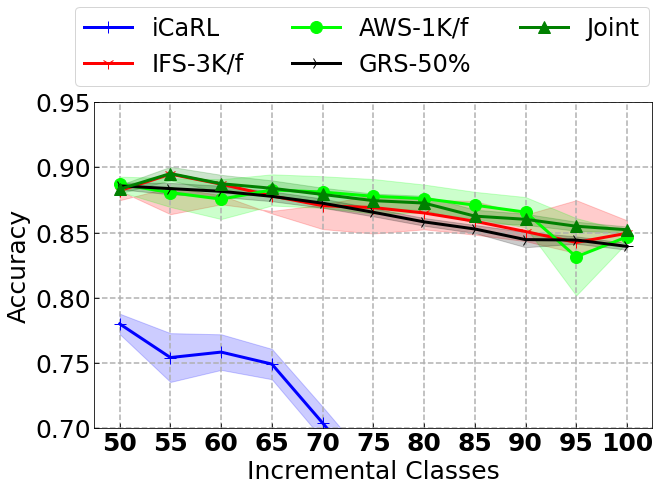

In [149]:
save_file = 'ICDM_Class.pdf'


x_axis = np.array([i for i in range(11)])

plt.figure(figsize=(10, 6))



# grs_00_prec = [np.mean(grs_00[i]) for i in range(len(grs_00))]
# none_sem = [stats.sem(np.mean(grs_00[i])) for i in range(len(grs_00))]
# grs_00_prec, none_sem = np.array(grs_00_prec), np.array(none_sem)
# plt.fill_between(x_axis + [1], grs_00_prec-none_sem, grs_00_prec+none_sem, color='cornflowerblue', alpha=0.2)
# plt.plot(x_axis + [1],grs_00_prec, 'cornflowerblue',marker= 'p', markersize=12, linewidth=3.0, label='None')



plt.fill_between(x_axis + [1], icarl_acc-icarl_sem, icarl_acc+icarl_sem, color='blue', alpha=0.2)
plt.plot(x_axis + [1],icarl_acc, 'blue',marker= '+', markersize=12, linewidth=3.0, label='iCaRL')



# ifs_1K_sem = [stats.sem(ifs_1K[i]) for i in range(len(ifs_1K))]
# ifs_1K_prec = [np.mean(ifs_1K[i]) for i in range(len(ifs_1K))]
# ifs_1K_prec, ifs_1K_sem = np.array(ifs_1K_prec), np.array(ifs_1K_sem)

# plt.fill_between(x_axis + [1], ifs_1K_prec-ifs_1K_sem, ifs_1K_prec+ifs_1K_sem, color='red', alpha=0.2)
# plt.plot(x_axis + [1],ifs_1K_prec, 'red',marker= '1', markersize=12, linewidth=3.0, label='IFS-1K/f')


ifs_3K_sem = [stats.sem(ifs_3K[i]) for i in range(len(ifs_3K))]
ifs_3K_prec = [np.mean(ifs_3K[i]) for i in range(len(ifs_3K))]
ifs_3K_prec, ifs_3K_sem = np.array(ifs_3K_prec), np.array(ifs_3K_sem)

plt.fill_between(x_axis + [1], ifs_3K_prec-ifs_3K_sem, ifs_1K_prec+ifs_3K_sem, color='red', alpha=0.2)
plt.plot(x_axis + [1],ifs_3K_prec, 'red',marker= '1', markersize=12, linewidth=3.0, label='IFS-3K/f')



aws_1K_sem = [stats.sem(aws_1K[i]) for i in range(len(aws_1K))]
aws_1K_prec = [np.mean(aws_1K[i]) for i in range(len(aws_1K))]
aws_1K_prec, aws_1K_sem = np.array(aws_1K_prec), np.array(aws_1K_sem)

plt.fill_between(x_axis + [1], aws_1K_prec-aws_1K_sem,\
                 aws_1K_prec+aws_1K_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],aws_1K_prec, 'lime',marker= 'o', markersize=12, linewidth=3.0, label='AWS-1K/f')

# aws_3K_sem = [stats.sem(aws_3K[i]) for i in range(len(aws_3K))]
# aws_3K_prec = [np.mean(aws_3K[i]) for i in range(len(aws_3K))]
# aws_3K_prec, aws_3K_sem = np.array(aws_3K_prec), np.array(aws_3K_sem)

# plt.fill_between(x_axis + [1], aws_3K_prec-aws_3K_sem,\
#                  aws_3K_prec+aws_3K_sem, color='lime', alpha=0.2)
# plt.plot(x_axis + [1],aws_3K_prec, 'lime',marker= 'o', markersize=12, linewidth=3.0, label='AWS-3K/f')


grs_50_sem = [stats.sem(grs_50[i]) for i in range(len(grs_50))]
grs_50_prec = [np.mean(grs_50[i]) for i in range(len(grs_50))]
grs_50_prec, grs_50_sem = np.array(grs_50_prec), np.array(grs_50_sem)

plt.fill_between(x_axis + [1], grs_50_prec-grs_50_sem, grs_50_prec+grs_50_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],grs_50_prec, 'black',marker= '4', markersize=12, linewidth=3.0, label='GRS-50%')



grs_100_sem = [stats.sem(grs_100[i]) for i in range(len(grs_100))]
grs_100_prec = [np.mean(grs_100[i]) for i in range(len(grs_100))]
grs_100_prec, grs_100_sem = np.array(grs_100_prec), np.array(grs_100_sem)
plt.fill_between(x_axis + [1], grs_100_prec-grs_100_sem, grs_100_prec+grs_100_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],grs_100_prec, 'green',marker= '^', markersize=12, linewidth=3.0, label='Joint')



# plt.legend(ncol=3, loc=(0.05, 1.05), fontsize=20, prop=dict(weight='bold'))
plt.legend(ncol=3, loc=(-0.035, 1.05), fontsize=24)

plt.ylim([0.7, 0.95])
plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Incremental Classes', fontsize=25)
plt.xticks([1,2,3,4,5,6, 7, 8, 9, 10, 11],\
           ['50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100'],\
           fontsize=25, fontweight ='bold')
plt.yticks(fontsize=25)
plt.grid(True, linestyle='--', linewidth=1.5)

plt.savefig('./ICDM_figs/' + save_file,
                bbox_inches='tight', dpi=300);

In [166]:
def MC_results(scenario, replay_config, 
                cnt_rate=0.1, anomaly_perct=0.5,
               replay_portion=1.0, num_replay_sample=500):

    target_classes = 100
    
    results_dir = './ember_results_cl/RC_Cluster_New/' + str(scenario) + '/' + str(target_classes) + '/'

    if replay_config == 'grs':
        result_file = str(replay_config)  + '_MC_' + str(replay_portion) + '_results.txt'
    elif replay_config == 'aws':
        result_file = str(replay_config) + '_MC_act4_' + str(num_replay_sample) + '_' + str(cnt_rate) + '_results.txt'
    else:
        result_file = str(replay_config)  + '_MC_' +\
                    str(num_replay_sample)  + '_' + str(cnt_rate) + '_results.txt'

        
    result_path = results_dir + result_file 
    print(result_path)
    
    Tr_Samples = []
    Tr_Times = []

    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:
                #print(line)
                infos = line.split('\t')
                task = infos[0]
                #print(int(task))
                num_sample, tr_time = float(infos[1]), float(infos[2])
                Tr_Samples.append(num_sample)
                Tr_Times.append(tr_time) 

    print()
    Tr_Samples, Tr_Times = np.array(Tr_Samples), np.array(Tr_Times)
    
    return Tr_Samples, Tr_Times*60


joint_S,joint_T = MC_results('class', replay_config='grs', replay_portion=1.0)

GRS5_S, GRS5_T = MC_results('class', replay_config='grs', replay_portion=.05)
GRS10_S, GRS10_T = MC_results('class', replay_config='grs', replay_portion=.10)
GRS20_S, GRS20_T = MC_results('class', replay_config='grs', replay_portion=.20)
GRS50_S, GRS50_T = MC_results('class', replay_config='grs', replay_portion=.50)

IFS50_S, IFS50_T = MC_results('class', replay_config='ifs', cnt_rate=0.1, num_replay_sample=50)
IFS100_S, IFS100_T = MC_results('class', replay_config='ifs', cnt_rate=0.1, num_replay_sample=100)
IFS200_S, IFS200_T = MC_results('class', replay_config='ifs', cnt_rate=0.1, num_replay_sample=200)
IFS500_S, IFS500_T = MC_results('class', replay_config='ifs', cnt_rate=0.1, num_replay_sample=500)
IFS1K_S, IFS1K_T = MC_results('class', replay_config='ifs', cnt_rate=0.1, num_replay_sample=1000)
IFS3K_S, IFS3K_T = MC_results('class', replay_config='ifs', cnt_rate=0.1, num_replay_sample=3000)
IFS5K_S, IFS5K_T = MC_results('class', replay_config='ifs', cnt_rate=0.1, num_replay_sample=5000)

AWS50_S, AWS50_T = MC_results('class', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=50)
AWS100_S, AWS100_T = MC_results('class', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=100)
AWS200_S, AWS200_T = MC_results('class', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=200)
AWS500_S, AWS500_T = MC_results('class', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=500)
AWS1K_S, AWS1K_T = MC_results('class', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=1000)
AWS3K_S, AWS3K_T = MC_results('class', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=3000)
AWS5K_S, AWS5K_T = MC_results('class', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=5000)

./ember_results_cl/RC_Cluster_New/class/100/grs_MC_1.0_results.txt

./ember_results_cl/RC_Cluster_New/class/100/grs_MC_0.05_results.txt

./ember_results_cl/RC_Cluster_New/class/100/grs_MC_0.1_results.txt

./ember_results_cl/RC_Cluster_New/class/100/grs_MC_0.2_results.txt

./ember_results_cl/RC_Cluster_New/class/100/grs_MC_0.5_results.txt

./ember_results_cl/RC_Cluster_New/class/100/ifs_MC_50_0.1_results.txt

./ember_results_cl/RC_Cluster_New/class/100/ifs_MC_100_0.1_results.txt

./ember_results_cl/RC_Cluster_New/class/100/ifs_MC_200_0.1_results.txt

./ember_results_cl/RC_Cluster_New/class/100/ifs_MC_500_0.1_results.txt

./ember_results_cl/RC_Cluster_New/class/100/ifs_MC_1000_0.1_results.txt

./ember_results_cl/RC_Cluster_New/class/100/ifs_MC_3000_0.1_results.txt

./ember_results_cl/RC_Cluster_New/class/100/ifs_MC_5000_0.1_results.txt

./ember_results_cl/RC_Cluster_New/class/100/aws_MC_act4_50_0.1_results.txt

./ember_results_cl/RC_Cluster_New/class/100/aws_MC_act4_100_0.1_results.txt



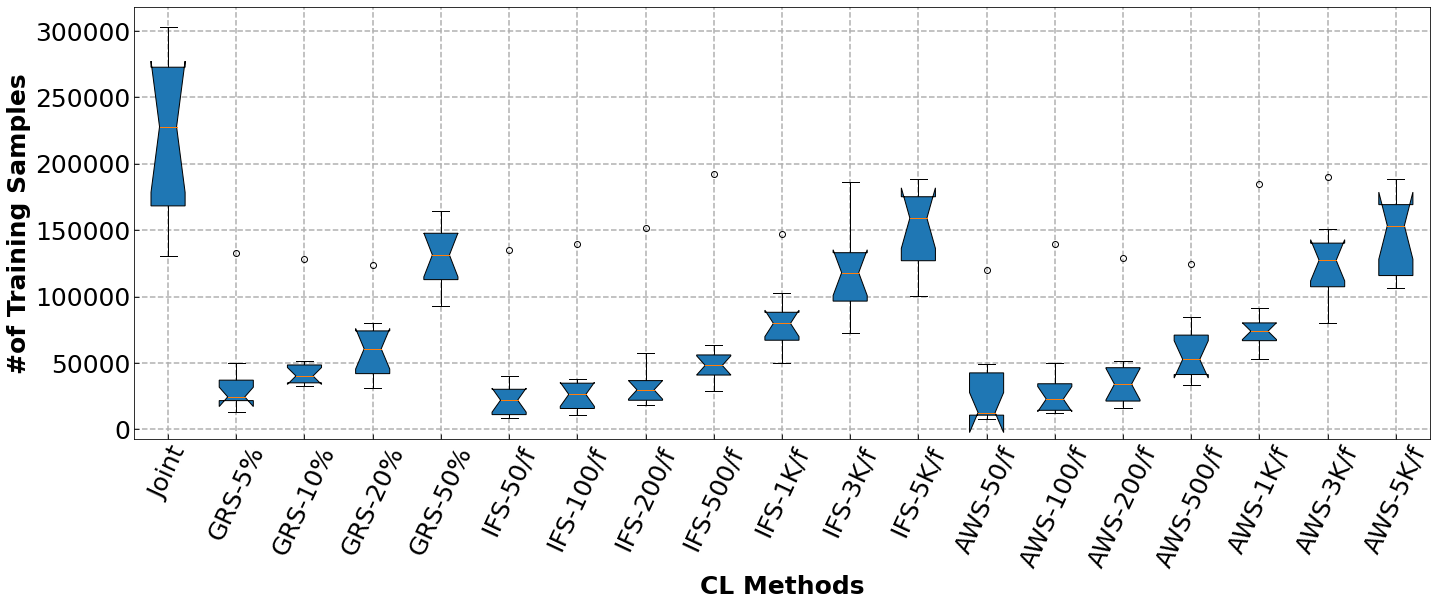

In [168]:
data = [joint_S, GRS5_S, GRS10_S, GRS20_S, GRS50_S,\
        IFS50_S, IFS100_S, IFS200_S, IFS500_S, IFS1K_S, IFS3K_S, IFS5K_S,\
        AWS50_S, AWS100_S, AWS200_S, AWS500_S, AWS1K_S, AWS3K_S, AWS5K_S]



fig = plt.figure(figsize =(18, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, notch='True', patch_artist=True, labels=['Joint',\
                               'GRS-5%','GRS-10%','GRS-20%', 'GRS-50%',\
                   'IFS-50/f','IFS-100/f','IFS-200/f','IFS-500/f','IFS-1K/f','IFS-3K/f','IFS-5K/f',\
                   'AWS-50/f', 'AWS-100/f', 'AWS-200/f', 'AWS-500/f', 'AWS-1K/f','AWS-3K/f','AWS-5K/f'],)




plt.xticks(rotation = 65, fontsize=25)
plt.ylabel('#of Training Samples', fontsize=25, fontweight ='bold')
plt.xlabel('CL Methods', fontsize=25, fontweight ='bold')
plt.yticks(fontsize=25)
plt.grid(True, linestyle='--', linewidth=1.5)


save_file = 'Class_Training_Samples.pdf'
plt.savefig('./ICDM_figs/' + save_file,
                bbox_inches='tight', dpi=300);

# show plot
plt.show()

In [113]:
ifs200_accs, ifs200_mean = get_results('ifs', '0.', num_replay_sample=200)

ifs500_accs, ifs500_mean = get_results('ifs', '0.', num_replay_sample=500)

Mean 84.20587336140417 STD 0.02663634411360769 Minimum 80.71269631900232 Minimum STD 2.039910652652444

Mean 86.03485055164967 STD 0.028818446382496313 Minimum 82.23786429814892 Minimum STD 2.0754238383924806



In [120]:
def results_for_pvalueTest(replay_config, replay_portion, cnt_rate=None, num_replay_sample=200):
    scenario = 'class'
    target_classes = 100
    
    results_dir = './ember_results_cl/' + str(scenario) + '/' + str(target_classes) + '/'
    if replay_config == 'grs':
        result_file = str(replay_config)  + '_' + str(replay_portion) + '_results.txt'
    
    if replay_config == 'ifs' or replay_config == 'frs' and cnt_rate == None:
        result_file = str(replay_config)  + '_' + str(num_replay_sample) + '_results.txt'
    
    if replay_config == 'ifs' and cnt_rate is not None:
        result_file = str(replay_config)  + '_' + str(num_replay_sample) + '_' + str(cnt_rate) + '_results.txt'
        
        
    result_path = results_dir + result_file 
    print()
    print(result_path)
    
    accs_dict = {}
    f1_dict = {}

    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:
                #print(line)
                infos = line.split('\t')
                task = infos[0]
                #print(int(task))
                acc, prec, recal, f1 = float(infos[1]), float(infos[2]), float(infos[3]), float(infos[4])

                if task in accs_dict.keys():
                    accs_dict[task].append(acc)
                    f1_dict[task].append(f1)
                else:
                    accs_dict[task] = [acc]
                    f1_dict[task] = [f1]

    def exps_mean(result_dict):
        min_num_exps = np.inf
        for k, v in result_dict.items():
            if len(v) < min_num_exps:
                min_num_exps = len(v)
        print(f'min_num_exps {min_num_exps}')

        exps_dict = {}
        for k, v in result_dict.items():
            v = v[-min_num_exps:]
            for y, x in enumerate(v):
                if y not in exps_dict.keys():
                    exps_dict[y] = [x]
                else:
                    exps_dict[y].append(x)

        mean_accs_exps = []
        for k, v in exps_dict.items():
            mean_accs_exps.append(np.mean(v))
        #print(np.mean(mean_accs_exps))
        #print(mean_accs_exps)

        return np.array(mean_accs_exps)
    
    
    print()
    accs_exps = exps_mean(accs_dict)
    f1s_exps = exps_mean(f1_dict)
    return accs_exps, f1s_exps



ifs_500_accs_exps, ifs_500_f1s_exps = results_for_pvalueTest('ifs', None, num_replay_sample=500)


./ember_results_cl/class/100/ifs_500_results.txt


ValueError: could not convert string to float: '[0.9055062360437884, 0.8908502012395364, 0.9064415352284495, 0.8987555779733745, 0.8165672362981142, 0.827114701461908, 0.8047309079093974, 0.7949435940205711, 0.8120085802431989, 0.8124300429841783, 0.8111478787229441]\n'

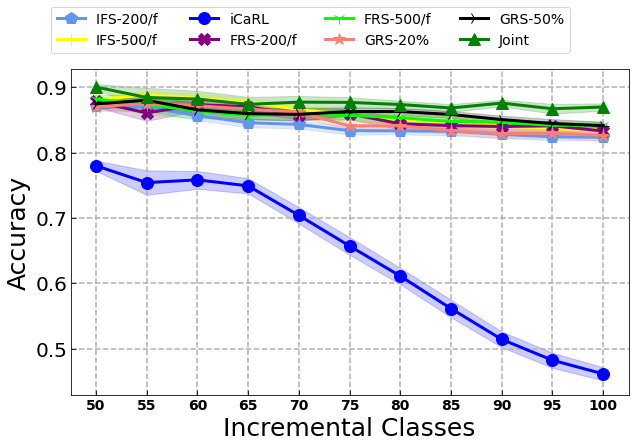

In [114]:
save_file_rocauc = 'EMBER_Class_Diversity.pdf'


x_axis = np.array([i for i in range(11)])

plt.figure(figsize=(10, 6))



# none_sem = [stats.sem(none_accs[i]) for i in range(len(none_accs))]
# plt.fill_between(x_axis + [1], none_mean-none_sem, none_mean+none_sem, color='olive', alpha=0.2)
# plt.plot(x_axis + [1],none_mean, 'olive', marker= 'D', markersize=12, linewidth=3.0, label='None')



ifs200_sem = [stats.sem(ifs200_accs[i]) for i in range(len(ifs200_accs))]
plt.fill_between(x_axis + [1], ifs200_mean-ifs200_sem, ifs200_mean+ifs200_sem, color='cornflowerblue', alpha=0.2)
plt.plot(x_axis + [1],ifs200_mean, 'cornflowerblue',marker= 'p', markersize=12, linewidth=3.0, label='IFS-200/f ')

ifs500_sem = [stats.sem(ifs500_accs[i]) for i in range(len(ifs500_accs))]
plt.fill_between(x_axis + [1], ifs500_mean-ifs500_sem, ifs500_mean+ifs500_sem, color='yellow', alpha=0.2)
plt.plot(x_axis + [1],ifs500_mean, 'yellow',marker= '+', markersize=12, linewidth=3.0, label='IFS-500/f')


# gr_sem = [stats.sem(gr_accs[i]) for i in range(len(gr_accs))]
# plt.fill_between(x_axis + [1], gr_mean-gr_sem, gr_mean+gr_sem, color='red', alpha=0.2)
# plt.plot(x_axis + [1],gr_mean, 'red',marker= 'H', markersize=12, linewidth=3.0, label='GR')


icarl_sem = [stats.sem(icarl_accs[i]) for i in range(len(icarl_accs))]
plt.fill_between(x_axis + [1], icarl_mean-icarl_sem, icarl_mean+icarl_sem, color='blue', alpha=0.2)
plt.plot(x_axis + [1], icarl_mean, 'blue',marker= 'o', markersize=12, linewidth=3.0, label='iCaRL')


# bir_sem = [stats.sem(bir_accs[i]) for i in range(len(bir_accs))]
# plt.fill_between(x_axis + [1], bir_mean-bir_sem, bir_mean+bir_sem, color='orange', alpha=0.2)
# plt.plot(x_axis + [1],bir_mean, 'orange',marker= '1', markersize=12, linewidth=3.0, label='BI-R')


# twohundred_sem = [stats.sem(twohundred_acc[i]) for i in range(len(twohundred_acc))]
# plt.fill_between(x_axis + [1], twohundred_acc_mean-twohundred_sem,\
#                  twohundred_acc_mean+twohundred_sem, color='purple', alpha=0.2)
# plt.plot(x_axis + [1],twohundred_acc_mean, 'purple',marker= 'X',\
#          markersize=12, linewidth=3.0, label='FRS-200/f')


# fivehundred_sem = [stats.sem(fivehundred_acc[i]) for i in range(len(fivehundred_acc))]
# plt.fill_between(x_axis + [1], fivehundred_acc_mean-fivehundred_sem,\
#                  fivehundred_acc_mean+fivehundred_sem, color='lime', alpha=0.2)
# plt.plot(x_axis + [1],fivehundred_acc_mean, 'lime',marker= 'o', markersize=12, linewidth=3.0, label='FRS-500/f')



frs200_sem = [stats.sem(frs200_accs[i]) for i in range(len(frs200_accs))]
plt.fill_between(x_axis + [1], frs200_mean-frs200_sem,\
                 frs200_mean+frs200_sem, color='purple', alpha=0.2)
plt.plot(x_axis + [1],frs200_mean, 'purple',marker= 'X',\
         markersize=12, linewidth=3.0, label='FRS-200/f')


frs500_sem = [stats.sem(frs500_accs[i]) for i in range(len(frs500_accs))]
plt.fill_between(x_axis + [1], frs500_mean-frs500_sem, frs500_mean+frs500_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],frs500_mean, 'lime',marker= '1', markersize=12, linewidth=3.0, label='FRS-500/f')



grs20_sem = [stats.sem(grs20_accs[i]) for i in range(len(grs20_accs))]
plt.fill_between(x_axis + [1], grs20_mean-grs20_sem, grs20_mean+grs20_sem, color='salmon', alpha=0.2)
plt.plot(x_axis + [1],grs20_mean, 'salmon',marker= '*', markersize=12, linewidth=3.0, label='GRS-20%')


grs50_sem = [stats.sem(grs50_accs[i]) for i in range(len(grs50_accs))]
plt.fill_between(x_axis + [1], grs50_mean-grs50_sem, grs50_mean+grs50_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],grs50_mean, 'black',marker= '4', markersize=12, linewidth=3.0, label='GRS-50%')



joint_sem = [stats.sem(joint_accs[i]) for i in range(len(joint_accs))]
plt.fill_between(x_axis + [1], joint_mean-joint_sem, joint_mean+joint_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],joint_mean, 'green',marker= '^', markersize=12, linewidth=3.0, label='Joint')



plt.legend(ncol=4, loc=(-0.035, 1.05), fontsize=14)


plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Incremental Classes', fontsize=25)
plt.xticks([1,2,3,4,5,6, 7, 8, 9, 10, 11],\
           ['50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100'],\
           fontsize=14, fontweight ='bold')
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', linewidth=1.5)

plt.savefig('./figs_proposal/' + save_file_rocauc,
                bbox_inches='tight', dpi=300);

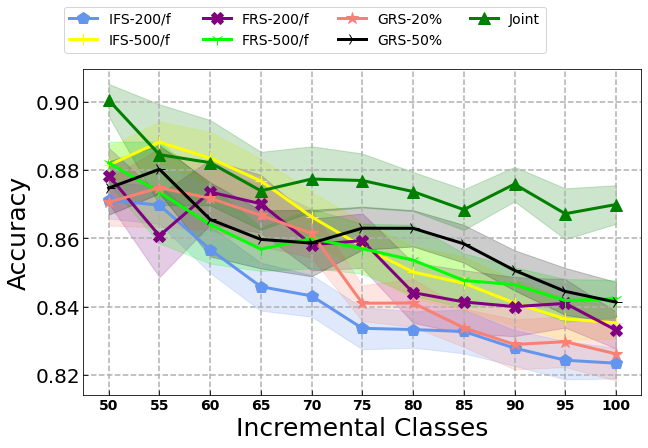

In [115]:
save_file_rocauc = 'EMBER_Class_Diversity_Limit.pdf'


x_axis = np.array([i for i in range(11)])

plt.figure(figsize=(10, 6))



# none_sem = [stats.sem(none_accs[i]) for i in range(len(none_accs))]
# plt.fill_between(x_axis + [1], none_mean-none_sem, none_mean+none_sem, color='olive', alpha=0.2)
# plt.plot(x_axis + [1],none_mean, 'olive', marker= 'D', markersize=12, linewidth=3.0, label='None')


ifs200_sem = [stats.sem(ifs200_accs[i]) for i in range(len(ifs200_accs))]
plt.fill_between(x_axis + [1], ifs200_mean-ifs200_sem, ifs200_mean+ifs200_sem, color='cornflowerblue', alpha=0.2)
plt.plot(x_axis + [1],ifs200_mean, 'cornflowerblue',marker= 'p', markersize=12, linewidth=3.0, label='IFS-200/f ')

ifs500_sem = [stats.sem(ifs500_accs[i]) for i in range(len(ifs500_accs))]
plt.fill_between(x_axis + [1], ifs500_mean-ifs500_sem, ifs500_mean+ifs500_sem, color='yellow', alpha=0.2)
plt.plot(x_axis + [1],ifs500_mean, 'yellow',marker= '+', markersize=12, linewidth=3.0, label='IFS-500/f')


# gr_sem = [stats.sem(gr_accs[i]) for i in range(len(gr_accs))]
# plt.fill_between(x_axis + [1], gr_mean-gr_sem, gr_mean+gr_sem, color='red', alpha=0.2)
# plt.plot(x_axis + [1],gr_mean, 'red',marker= 'H', markersize=12, linewidth=3.0, label='GR')


# icarl_sem = [stats.sem(icarl_accs[i]) for i in range(len(icarl_accs))]
# plt.fill_between(x_axis + [1], icarl_mean-icarl_sem, icarl_mean+icarl_sem, color='blue', alpha=0.2)
# plt.plot(x_axis + [1], icarl_mean, 'blue',marker= 'o', markersize=12, linewidth=3.0, label='iCaRL')


# bir_sem = [stats.sem(bir_accs[i]) for i in range(len(bir_accs))]
# plt.fill_between(x_axis + [1], bir_mean-bir_sem, bir_mean+bir_sem, color='orange', alpha=0.2)
# plt.plot(x_axis + [1],bir_mean, 'orange',marker= '1', markersize=12, linewidth=3.0, label='BI-R')


# twohundred_sem = [stats.sem(twohundred_acc[i]) for i in range(len(twohundred_acc))]
# plt.fill_between(x_axis + [1], twohundred_acc_mean-twohundred_sem,\
#                  twohundred_acc_mean+twohundred_sem, color='purple', alpha=0.2)
# plt.plot(x_axis + [1],twohundred_acc_mean, 'purple',marker= 'X',\
#          markersize=12, linewidth=3.0, label='FRS-200/f')


# fivehundred_sem = [stats.sem(fivehundred_acc[i]) for i in range(len(fivehundred_acc))]
# plt.fill_between(x_axis + [1], fivehundred_acc_mean-fivehundred_sem,\
#                  fivehundred_acc_mean+fivehundred_sem, color='lime', alpha=0.2)
# plt.plot(x_axis + [1],fivehundred_acc_mean, 'lime',marker= 'o', markersize=12, linewidth=3.0, label='FRS-500/f')



frs200_sem = [stats.sem(frs200_accs[i]) for i in range(len(frs200_accs))]
plt.fill_between(x_axis + [1], frs200_mean-frs200_sem,\
                 frs200_mean+frs200_sem, color='purple', alpha=0.2)
plt.plot(x_axis + [1],frs200_mean, 'purple',marker= 'X',\
         markersize=12, linewidth=3.0, label='FRS-200/f')


frs500_sem = [stats.sem(frs500_accs[i]) for i in range(len(frs500_accs))]
plt.fill_between(x_axis + [1], frs500_mean-frs500_sem, frs500_mean+frs500_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],frs500_mean, 'lime',marker= '1', markersize=12, linewidth=3.0, label='FRS-500/f')



grs20_sem = [stats.sem(grs20_accs[i]) for i in range(len(grs20_accs))]
plt.fill_between(x_axis + [1], grs20_mean-grs20_sem, grs20_mean+grs20_sem, color='salmon', alpha=0.2)
plt.plot(x_axis + [1],grs20_mean, 'salmon',marker= '*', markersize=12, linewidth=3.0, label='GRS-20%')


grs50_sem = [stats.sem(grs50_accs[i]) for i in range(len(grs50_accs))]
plt.fill_between(x_axis + [1], grs50_mean-grs50_sem, grs50_mean+grs50_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],grs50_mean, 'black',marker= '4', markersize=12, linewidth=3.0, label='GRS-50%')



joint_sem = [stats.sem(joint_accs[i]) for i in range(len(joint_accs))]
plt.fill_between(x_axis + [1], joint_mean-joint_sem, joint_mean+joint_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],joint_mean, 'green',marker= '^', markersize=12, linewidth=3.0, label='Joint')



plt.legend(ncol=4, loc=(-0.035, 1.05), fontsize=14)


plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Incremental Classes', fontsize=25)
plt.xticks([1,2,3,4,5,6, 7, 8, 9, 10, 11],\
           ['50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100'],\
           fontsize=14, fontweight ='bold')
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', linewidth=1.5)

plt.savefig('./figs_proposal/' + save_file_rocauc,
                bbox_inches='tight', dpi=300);

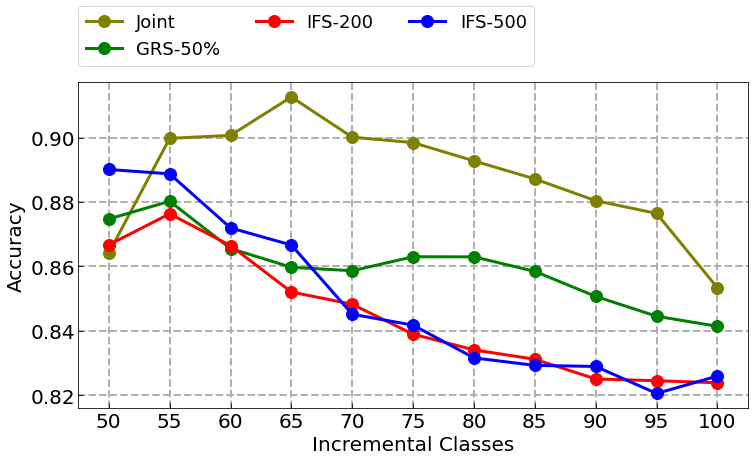

In [81]:
save_filename = 'EMBER_Class_Diversity.png'

plt.figure(figsize=(12, 6))

x_axis = np.array([i for i in range(len(grs_100))])

plt.plot(x_axis + [1], grs100, 'olive', marker= 'o', markersize=12, linewidth=3.0, label='Joint')


plt.plot(x_axis + [1], grs50, 'green',marker= 'o', markersize=12, linewidth=3.0, label='GRS-50%')


plt.plot(x_axis + [1], ifs200, 'red',marker= 'o', markersize=12, linewidth=3.0, label='IFS-200')


plt.plot(x_axis + [1], ifs500, 'blue',marker= 'o', markersize=12, linewidth=3.0, label='IFS-500')

plt.legend(ncol=3, loc=(0.0, 1.05))

plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Incremental Classes', fontsize=20)
plt.xticks([1,2,3,4,5,6, 7, 8, 9, 10, 11], ['50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100'], fontsize=20) 
plt.yticks(fontsize=20)

plt.grid(True, linestyle='--', linewidth=2.)

# plt.savefig('./figs_proposal/' + save_filename,
#                 bbox_inches='tight', 
#                transparent=True);


